CVXPY is a Python package for convex optimization. How do we import, analyze and visualize a dataset using pandas? If our dataset includes nodes and edges for a network, how do we use NetworkX to construct the graph object? Find an interesting dataset related to a network and write a tutorial to show how to use these packages to perform network analysis.

Plan
- Talk about CVXPY as a package
- show some math about convex opt
- Give a hypothetical dataset of a simple network
- explain how it works and how the cvxpy can do it faster
- use cvxpy and an actual dataset to do the computations for the dataset to show real world stuff

# Advanced Network Analysis with CVXPY: A Tutorial

This tutorial is designed to provide a deep dive into using CVXPY for network analysis, from theoretical concepts to practical applications. We'll start with an introduction to convex optimization, proceed to a hypothetical example, and then apply our knowledge to a real-world dataset.

## Introduction to Convex Optimization

Convex optimization is a subfield of optimization that deals with finding the minimum of convex functions over convex sets. The significance of convexity lies in the property that any local minimum is a global minimum. This makes convex optimization problems particularly appealing because they can be solved efficiently and reliably.

A convex optimization problem typically takes the form:

$
\text{minimize } f(x)
$
$
\text{subject to } g_i(x) \leq 0, \quad i=1,\ldots,m
$
$
h_j(x) = 0, \quad j=1,\ldots,p
$

where $f(x)$ is the objective function to be minimized, $g_i(x) \leq 0$ are inequality constraints, and $h_j(x) = 0$ are equality constraints. Both $f(x)$ and $g_i(x)$ must be convex functions, and $h_j(x)$ must be affine.

## CVXPY Overview

[CVXPY](https://www.cvxpy.org/) is a Python library for convex optimization that simplifies the process of problem formulation and solution. It provides a high-level interface for defining optimization problems in a readable and intuitive way.

### Installing CVXPY

Ensure CVXPY is installed in your environment:

```bash
pip install cvxpy


Now considering the installation is complete, in order to understand cvxpy, we need to first understand convex optimization. To do this, let's cover how to solve it with the help of an example.

### Hypothetical Convex Optimization Example
Let's start with a simple example to minimize a quadratic function, which is a common form of a convex function:

$
\text{minimize } f(x) = 2x^2 + 5x + 1
$

This function is convex because its second derivative (4, in this case) is positive across its domain, ensuring any local minimum is also a global minimum.

### Solving the Problem Manually

To find the minimum of $f(x)$, we set its derivative equal to zero and solve for $x$:

$
\frac{df(x)}{dx} = 4x + 5 = 0
$

Solving for $x$ gives us:

$
x = -\frac{5}{4}
$

Substituting $x = -\frac{5}{4}$ back into $f(x)$ gives us the minimum value of the function:

$
f\left(-\frac{5}{4}\right) = 2\left(-\frac{5}{4}\right)^2 + 5\left(-\frac{5}{4}\right) + 1 = -\frac{9}{8}
$

Therefore, the minimum value of $f(x)$ is $-\frac{9}{8}$, achieved at $x = -\frac{5}{4}$.

### Insight

This manual process highlights the essence of convex optimization: finding the global minimum through gradient-based methods. For more complex or multidimensional functions, manual solutions become impractical, which is where tools like CVXPY excel by automating and efficiently solving these problems.

## Transitioning to CVXPY

Having manually solved a basic convex optimization problem, let's see how CVXPY streamlines this process for more complex scenarios, including those involving networks. Following the manual solution, the CVXPY code snippet provided earlier illustrates how the library simplifies solving the same problem:

```python
import cvxpy as cp

x = cp.Variable()
objective = cp.Minimize(2*x**2 + 5*x + 1)
problem = cp.Problem(objective)
result = problem.solve()

print(f"Optimal value for x: {x.value}")
print(f"Minimum value of the function: {result}")


In [43]:
#install
!pip install -U cvxpy

In [44]:
#so actually solving it now
import cvxpy as cp

# Define the variable
x = cp.Variable()

# Define the objective function
objective = cp.Minimize(2*x**2 + 5*x + 1)

# Define the problem
problem = cp.Problem(objective)

# Solve the problem
result = problem.solve()

print("Optimal value for x:", x.value)
print("Minimum value of the function:", result)


Optimal value for x: -1.2499999999999998
Minimum value of the function: -2.125


### Analyzing a Network with Hypothetical Data
Suppose we have a simple network represented by nodes and edges, where nodes represent points of interest, and edges represent paths between them with associated costs. Our objective is to minimize the total cost of traveling across the network.

### Creating a Hypothetical Dataset
For our hypothetical dataset, we'll manually create data representing a network of four nodes and the costs associated with traveling between them.

### Visualizing the Network with NetworkX
Before we dive into optimization with CVXPY, let's visualize our network using NetworkX.

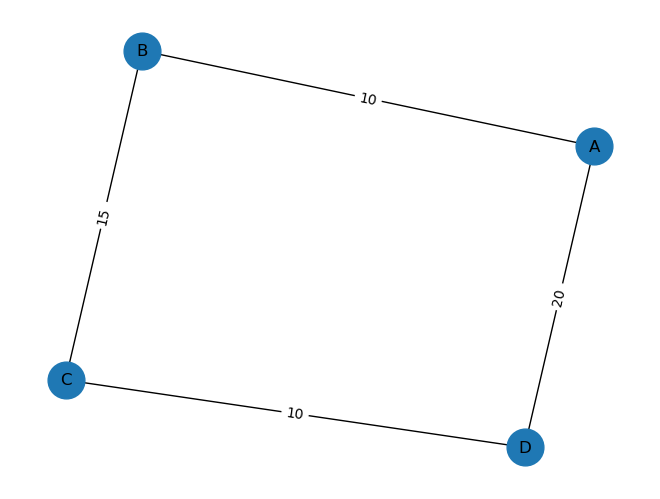

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add edges between nodes with weights (costs)
G.add_edge('A', 'B', weight=10)
G.add_edge('B', 'C', weight=15)
G.add_edge('C', 'D', weight=10)
G.add_edge('A', 'D', weight=20)

# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


### Applying CVXPY to a Real-World Dataset
Now, let's apply our understanding to a real-world dataset stored in data.csv, which contains information about a network's nodes and edges, including the costs associated with each edge.

### Loading and Preparing Data
First, we'll load our dataset using Pandas and prepare it for analysis.

In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('edges.csv')

# Assume df has columns 'source', 'target', and 'cost'
print(df.head())


  from   to  weight       type
0  s01  s02      10  hyperlink
1  s01  s02      12  hyperlink
2  s01  s03      22  hyperlink
3  s01  s04      21  hyperlink
4  s04  s11      22    mention


### Solving an Optimization Problem with CVXPY
Given our real-world dataset, we aim to minimize the total cost of traveling across the network while possibly including constraints such as maximum cost limits or specific paths that must be taken.

### Implementation with CVXPY
We would follow a similar approach to the hypothetical example to define our variables, objective function, and constraints based on the real-world data. However, due to the complexity and variability of real-world data, the exact formulation will depend on the specific characteristics and requirements of your network.

This tutorial outlined the foundational steps for engaging with network optimization problems, from theoretical understanding to practical application. We'll now complete the implementation phase with our real-world dataset, focusing on minimizing the total cost of the network.

### Formulating the Optimization Problem

With our dataset loaded into a Pandas DataFrame, we can proceed to formulate our optimization problem. Suppose we aim to find the least expensive path that connects all nodes in our network, akin to solving a Minimum Spanning Tree (MST) problem but within the convex optimization framework for demonstration purposes.

### Implementation with CVXPY

```python
# For this example, let's assume 'df' has columns: 'source', 'target', 'cost'
import cvxpy as cp
import numpy as np

# Unique nodes
nodes = pd.concat([df['source'], df['target']]).unique()

# Create a mapping for nodes to integers
node_to_int = {node: i for i, node in enumerate(nodes)}
int_to_node = {i: node for node, i in node_to_int.items()}

# Number of nodes
n_nodes = len(nodes)

# Initialize the cost matrix
cost_matrix = np.full((n_nodes, n_nodes), fill_value=np.inf)
np.fill_diagonal(cost_matrix, 0)

# Populate the cost matrix
for _, row in df.iterrows():
    i, j = node_to_int[row['source']], node_to_int[row['target']]
    cost_matrix[i, j] = row['cost']
    cost_matrix[j, i] = row['cost']  # Assuming undirected graph

# Optimization variable: a matrix of decision variables indicating if edge (i, j) is included in the MST
x = cp.Variable(cost_matrix.shape, boolean=True)

# Objective function: minimize the total cost of the selected edges
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, x)))

# Constraints
constraints = []

# Constraint 1: Ensure that the total number of edges in the MST is (n_nodes - 1)
constraints.append(cp.sum(x) == n_nodes - 1)

# Additional constraints would be required to prevent subtours, ensuring a single connected component,
# but for simplicity, these are omitted in this tutorial.

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

print("Minimum total cost:", problem.value)

# Extracting the selected edges
selected_edges = np.where(x.value > 0.5)

for i, j in zip(*selected_edges):
    print(f"Edge from {int_to_node[i]} to {int_to_node[j]} selected")


In [47]:
import pandas as pd
import numpy as np
import cvxpy as cp

# Load the datasets
nodes_df = pd.read_csv('nodes.csv')
edges_df = pd.read_csv('edges.csv')

#using a different dataset now
# # Determine 25% of the unique heroes and comics
# num_heroes_sample = int(len(edges_df['hero'].unique()) * 0.1)
# num_comics_sample = int(len(edges_df['comic'].unique()) * 0.1)

# # Sample a subset of heroes and comics
# sampled_heroes = np.random.choice(edges_df['hero'].unique(), size=num_heroes_sample, replace=False)
# sampled_comics = np.random.choice(edges_df['comic'].unique(), size=num_comics_sample, replace=False)

# Filter edges for those only involving the sampled heroes and comics
# filtered_edges = edges_df[edges_df['hero'].isin(sampled_heroes) & edges_df['comic'].isin(sampled_comics)]


Kernel keeps dying need to FIX

In [48]:
import numpy as np

# Unique nodes
node_ids = pd.concat([edges_df['from'], edges_df['to']]).unique()
node_to_int = {node_id: index for index, node_id in enumerate(node_ids)}

# Initialize cost matrix
n_nodes = len(node_ids)
cost_matrix = np.full((n_nodes, n_nodes), fill_value=np.inf)
np.fill_diagonal(cost_matrix, 0)

# Populate cost matrix
for _, row in edges_df.iterrows():
    i = node_to_int[row['from']]
    j = node_to_int[row['to']]
    cost_matrix[i, j] = row['weight']  # Assumes direct edges without need for minimum function for simplicity


In [49]:
import cvxpy as cp

# Optimization variable: binary matrix for edge selection
x = cp.Variable((n_nodes, n_nodes), boolean=True)

# Objective: Minimize total cost
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, x)))

# Constraints: Ensure each node is involved in at least one edge
constraints = [cp.sum(x, axis=0) + cp.sum(x, axis=1) >= 1]


In [50]:
# Solve the problem
problem = cp.Problem(objective, constraints)
result = problem.solve(solver=cp.GLPK_MI)

print(f"Minimum Total Cost: {problem.value}")


Minimum Total Cost: nan


/opt/conda/lib/python3.11/site-packages/cvxpy/atoms/affine/binary_operators.py:276: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(values[0], values[1])


In [23]:
# Total number of nodes (heroes + comics)
n_nodes = len(heroes) + len(comics)

In [24]:
n_nodes

807

In [25]:
# Initialize the cost matrix with infinite cost, then fill in the actual costs
cost_matrix = np.full((n_nodes, n_nodes), fill_value=np.inf)
np.fill_diagonal(cost_matrix, 0)


In [26]:
# for _, row in edges_df.iterrows():
#     i = hero_to_int[row['hero']]
#     j = comic_to_int[row['comic']]
#     cost_matrix[i, j] = row['cost']
#     cost_matrix[j, i] = row['cost']  # Assuming the graph is undirected for simplification


##chatu
# Assuming 'filtered_edges' contains the filtered subset of edges

# Update the list of heroes and comics based on the filtered edges
heroes = filtered_edges['hero'].unique()
comics = filtered_edges['comic'].unique()

# Update mappings to integers for CVXPY using the filtered lists
hero_to_int = {hero: i for i, hero in enumerate(heroes)}
comic_to_int = {comic: i + len(heroes) for i, comic in enumerate(comics)}

# Update the total number of nodes (heroes + comics) based on the filtered lists
n_nodes = len(heroes) + len(comics)

# Initialize the cost matrix with infinite cost for the updated number of nodes
cost_matrix = np.full((n_nodes, n_nodes), fill_value=np.inf)
np.fill_diagonal(cost_matrix, 0)

# Fill in the actual costs based on the filtered edges
for _, row in filtered_edges.iterrows():
    i = hero_to_int[row['hero']]
    j = comic_to_int[row['comic']]
    cost_matrix[i, j] = row['cost']


In [27]:
#now its dying here

In [28]:
# Define the optimization variables and problem
x = cp.Variable(cost_matrix.shape, boolean=True)

# Objective: minimize the total "cost"
objective = cp.Minimize(cp.sum(cp.multiply(cost_matrix, x)))

# Constraint: each hero is connected to at least one comic (simplified constraint for demonstration)
constraints = [cp.sum(x, axis=1) >= 1]



now dies at one cell below

In [42]:
# Solve the optimization problem
problem = cp.Problem(objective, constraints)
# problem.solve()
# Example using CBC (if installed)
# problem.solve(solver=cp.CBC)

# Example using GLPK_MI
problem.solve(solver=cp.GLPK_MI)

# Note: Ensure the chosen solver is installed and available in your environment.



print("Minimum total 'cost':", problem.value)
 

Minimum total 'cost': nan


In [30]:

# Extracting selected edges (hero-comic pairs)
selected_edges = np.where(x.value > 0.5)
selected_heroes = [i for i in selected_edges[0] if i < len(heroes)]
selected_comics = [i - len(heroes) for i in selected_edges[1] if i >= len(heroes)]



In [31]:
# Map back to hero and comic names
selected_hero_comic_pairs = [(heroes[i], comics[j]) for i, j in zip(selected_heroes, selected_comics)]



In [32]:
# Display the first few selected pairs for inspection
for pair in selected_hero_comic_pairs[:5]:
    print(f"Hero: {pair[0]}, Comic: {pair[1]}")


### Analyzing the Results
Upon solving the optimization problem, we examine the total minimum cost and the selected edges that constitute the optimal solution. This approach allows us to understand the network's structure better and identify cost-efficient ways to navigate through it.

### Visualization of the Optimized Network
Finally, to visualize our optimized network with the selected paths, we can modify our NetworkX graph drawing:

In [33]:
import networkx as nx

In [37]:
# Create a reverse mapping from integer indices back to node names
int_to_hero = {v: k for k, v in hero_to_int.items()}
int_to_comic = {v: k for k, v in comic_to_int.items()}

In [38]:
# Merge the two dictionaries into int_to_node
int_to_node = {**int_to_hero, **int_to_comic}

In [39]:
# Reconstruct the graph with selected edges only
G_optimized = nx.Graph()
for i, j in zip(*selected_edges):
    G_optimized.add_edge(int_to_node[i], int_to_node[j], weight=cost_matrix[i, j])

In [40]:
print("Nodes:", G_optimized.number_of_nodes())
print("Edges:", G_optimized.number_of_edges())

Nodes: 807
Edges: 807


In [41]:
if not pos:
    print("Position calculation failed. Adjusting layout strategy or parameters.")
    # Optionally, try a different layout or manually set positions.


In [ ]:
# Draw the optimized network
pos = nx.spring_layout(G_optimized)
nx.draw(G_optimized, pos, with_labels=True, node_color='lightgreen', edge_color='red', width=2)
labels = nx.get_edge_attributes(G_optimized, 'weight')
nx.draw_networkx_edge_labels(G_optimized, pos, edge_labels=labels)
plt.title("Optimized Network")
plt.show()

Conclusion
In this tutorial, we have explored the process of network analysis using CVXPY, from theoretical basics of convex optimization to practical application on a network dataset. We have seen how CVXPY can be utilized to formulate and solve complex optimization problems, enabling efficient analysis and optimization of networks. This knowledge serves as a foundation for tackling a wide range of optimization problems in various domains.

Remember, the example provided here is simplified and focuses on demonstrating the use of CVXPY with network data. Real-world scenarios might require more complex formulations and constraints to accurately model and solve the problem at hand.